In [9]:
# --- Import Libraries ---

import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [10]:
# --- Dataset Paths ---
dataset_dir = "../dataset"

In [11]:
# --- Data Augmentation + Split ---
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode="binary",
    subset="training"
)

val_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode="binary",
    subset="validation"
)

Found 800 images belonging to 2 classes.
Found 199 images belonging to 2 classes.


In [12]:
# --- Compute Class Weights (handle imbalance) ---
classes = np.array([0,1])
weights = compute_class_weight(
    class_weight="balanced",
    classes=classes,
    y=train_data.classes
)
class_weights = dict(zip(classes, weights))

In [13]:
# --- Build CNN Model ---
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss="binary_crossentropy",
              metrics=["accuracy"])

C:\Users\malik\anaconda3\envs\ds_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# --- Train Model ---
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    class_weight=class_weights,
    verbose=1
)

C:\Users\malik\anaconda3\envs\ds_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.8050 - loss: 0.4515 - val_accuracy: 0.8442 - val_loss: 0.3071
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.9137 - loss: 0.2166 - val_accuracy: 0.9447 - val_loss: 0.1842
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.9438 - loss: 0.1413 - val_accuracy: 0.9548 - val_loss: 0.1602
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.9550 - loss: 0.1279 - val_accuracy: 0.9296 - val_loss: 0.2043
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.9463 - loss: 0.1567 - val_accuracy: 0.9146 - val_loss: 0.2255
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.9488 - loss: 0.1595 - val_accuracy: 0.9196 - val_loss: 0.2406
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.9600 - loss: 0.1131 - val_accuracy: 0.9548 - val_loss: 0.1749
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.9600 - loss: 0.0914 - val_accuracy: 0.9447 - val_loss:

In [15]:
# --- Saving Model ---
os.makedirs("../models", exist_ok=True)
model.save("../models/forest_fire_cnn.h5")

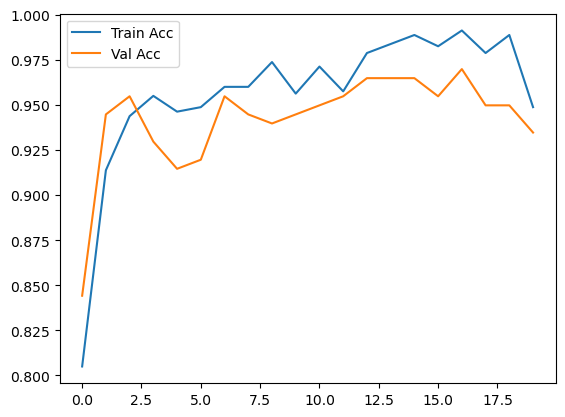

In [16]:
# --- Ploting Training History ---
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.legend(); plt.show()